In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy.optimize import curve_fit
rc('font',**{'size':16})
rc('lines', **{'linewidth':3.0})
rc('savefig', **{'facecolor':'white'})
rc('axes', **{'labelsize':16})
rc('xtick', **{'direction':'in', 'top':True, 'minor.visible':True})
rc('ytick', **{'direction':'in', 'right':True, 'minor.visible':True})

In [24]:
Wthick_A_dz = 0.75
W_A_dz = 0.75
Wthick_B_dz = 2.25
W_B_dz = 1.5
Wthick_C_dz = 3.5
W_C_dz = 1.75
Wthick_D_dz = 7.0
W_D_dz = 3.5
CFMix_dz = 0.05
CFMixThick_dz = 0.2
PCB_dz = 1.5
Si_dz = 0.5
C_dz = 0.5
Al_dz = 2.0

# limited by construction
FrontTolerance = 0.5

#gap between layers
BackTolerance = 0.5

#air separting PCBs from PCB MotherBoards
PCB_Motherboard_Gap = 2.3

#Air separating Carbon sheets in the middle of a layer
CoolingAirGap = 4.0

#Preshower thickness is 20.1 mm --> 
preshower_Thickness = Al_dz + FrontTolerance + PCB_dz + PCB_Motherboard_Gap + PCB_dz + CFMix_dz + Si_dz + CFMixThick_dz + CoolingAirGap + 2.*C_dz + CFMixThick_dz + Si_dz + CFMix_dz + PCB_dz + PCB_Motherboard_Gap + PCB_dz + BackTolerance

#Layer A thickness is 20.35 mm --> 
layer_A_Thickness = Wthick_A_dz + FrontTolerance + PCB_dz + PCB_Motherboard_Gap + PCB_dz + CFMix_dz + Si_dz + CFMixThick_dz + W_A_dz + C_dz + CoolingAirGap + C_dz + W_A_dz + CFMixThick_dz + Si_dz + CFMix_dz + PCB_dz + PCB_Motherboard_Gap + PCB_dz + BackTolerance

#Layer B thickness is 22.35 mm --> 
layer_B_Thickness = Wthick_B_dz + FrontTolerance + PCB_dz + PCB_Motherboard_Gap + PCB_dz + CFMix_dz + Si_dz + CFMixThick_dz + W_B_dz + C_dz + CoolingAirGap + C_dz + W_B_dz + CFMixThick_dz + Si_dz + CFMix_dz + PCB_dz + PCB_Motherboard_Gap + PCB_dz + BackTolerance

#Layer C thickness is 25.1 mm --> 
layer_C_Thickness = Wthick_C_dz + FrontTolerance + PCB_dz + PCB_Motherboard_Gap + PCB_dz + CFMix_dz + Si_dz + CFMixThick_dz + W_C_dz + C_dz + CoolingAirGap + C_dz + W_C_dz + CFMixThick_dz + Si_dz + CFMix_dz + PCB_dz + PCB_Motherboard_Gap + PCB_dz + BackTolerance

#Layer D thickness is 32.1 mm --> 
layer_D_Thickness = Wthick_D_dz + FrontTolerance + PCB_dz + PCB_Motherboard_Gap 
+ PCB_dz + CFMix_dz + Si_dz + CFMixThick_dz + W_D_dz + C_dz 
+ CoolingAirGap + C_dz + W_D_dz + CFMixThick_dz + Si_dz 
+ CFMix_dz + PCB_dz + PCB_Motherboard_Gap + PCB_dz 
+ BackTolerance

#Number of layers --> 
ecal_A_layers = 1
ecal_B_layers = 1
ecal_C_layers = 9
ecal_D_layers = 5    

#ECal thickness is 449.2 mm -->  
ECal_dz =preshower_Thickness + layer_A_Thickness*ecal_A_layers + layer_B_Thickness*ecal_B_layers + layer_C_Thickness*ecal_C_layers + layer_D_Thickness*ecal_D_layers

ecal_front_z = 240

########################## Calculate z pos of each absorber layer

# to begin, only use metal layers.

# first absorber is alimunum
#l1s = ecal_front_z
#l1e = ecal_front_z + all

#second is carbon???

# preshower 
l0si = ecal_front_z + Al_dz + FrontTolerance + PCB_dz + PCB_Motherboard_Gap + PCB_dz + CFMix_dz
l0sie = l0si + Si_dz

l01si = l0sie + CFMixThick_dz + CoolingAirGap + 2.*C_dz + CFMixThick_dz
l01sie = l01si + Si_dz

# begin in layer A.

l1s = ecal_front_z + preshower_Thickness
l1e = l1s + Wthick_A_dz
l1si = l1e + FrontTolerance + PCB_dz + PCB_Motherboard_Gap + PCB_dz + CFMix_dz
l1sie = l1si + Si_dz


l2s = l1e + FrontTolerance + PCB_dz + PCB_Motherboard_Gap + PCB_dz + CFMix_dz + Si_dz + CFMixThick_dz
l2e = l2s + W_A_dz

l3s = l2e + C_dz + CoolingAirGap + C_dz 
l3e = l3s + W_A_dz
l3si = l3e + CFMixThick_dz
l3sie = l3si + Si_dz

# layer B

l4s = ecal_front_z + preshower_Thickness + layer_A_Thickness
l4e = l4s + Wthick_B_dz
l4si = l4e + FrontTolerance + PCB_dz + PCB_Motherboard_Gap + PCB_dz + CFMix_dz
l4sie = l4si + Si_dz

l5s = l4e + FrontTolerance + PCB_dz + PCB_Motherboard_Gap + PCB_dz + CFMix_dz + Si_dz + CFMixThick_dz 
l5e = l5s + W_B_dz

l6s = l5e + C_dz + CoolingAirGap + C_dz 
l6e = l6s + W_B_dz
l6si = l6e + CFMixThick_dz
l6sie = l6si + Si_dz

# first layer C

l7s = l4s + layer_B_Thickness
l7e = l7s + Wthick_C_dz
l7si = l7e + FrontTolerance + PCB_dz + PCB_Motherboard_Gap + PCB_dz + CFMix_dz
l7sie = l7si + Si_dz

l8s = l7e + FrontTolerance + PCB_dz + PCB_Motherboard_Gap + PCB_dz + CFMix_dz + Si_dz + CFMixThick_dz
l8e = l8s + W_C_dz

l9s = l8e + C_dz + CoolingAirGap + C_dz
l9e = l9s + W_C_dz
l9si = l9e + CFMixThick_dz
l9sie = l9si + Si_dz


# another C layer

l10s = l7s + layer_C_Thickness
l10e = l10s + Wthick_C_dz
l10si = l10e + FrontTolerance + PCB_dz + PCB_Motherboard_Gap + PCB_dz + CFMix_dz
l10sie = l10si + Si_dz

l11s = l10e + FrontTolerance + PCB_dz + PCB_Motherboard_Gap + PCB_dz + CFMix_dz + Si_dz + CFMixThick_dz
l11e = l11s + W_C_dz

l12s = l11e + C_dz + CoolingAirGap + C_dz
l12e = l12s + W_C_dz
l12si = l12e + CFMixThick_dz
l12sie = l12si + Si_dz

# another C layer

l13s = l10s + layer_C_Thickness
l13e = l13s + Wthick_C_dz
l13si = l13e + FrontTolerance + PCB_dz + PCB_Motherboard_Gap + PCB_dz + CFMix_dz
l13sie = l13si + Si_dz

l14s = l13e + FrontTolerance + PCB_dz + PCB_Motherboard_Gap + PCB_dz + CFMix_dz + Si_dz + CFMixThick_dz
l14e = l14s + W_C_dz

l15s = l14e + C_dz + CoolingAirGap + C_dz
l15e = l15s + W_C_dz
l15si = l15e + CFMixThick_dz
l15sie = l15si + Si_dz

# another C layer

l16s = l13s + layer_C_Thickness
l16e = l16s + Wthick_C_dz
l16si = l16e + FrontTolerance + PCB_dz + PCB_Motherboard_Gap + PCB_dz + CFMix_dz
l16sie = l16si + Si_dz

l17s = l16e + FrontTolerance + PCB_dz + PCB_Motherboard_Gap + PCB_dz + CFMix_dz + Si_dz + CFMixThick_dz
l17e = l17s + W_C_dz

l18s = l17e + C_dz + CoolingAirGap + C_dz
l18e = l18s + W_C_dz
l18si = l18e + CFMixThick_dz
l18sie = l18si + Si_dz

sistart = [l0si, l01si, l1si, l3si, l4si, l6si, l7si, l9si, l10si, l12si, l13si, l15si, l16si, l18si]
siend = [l0sie, l01sie, l1sie, l3sie, l4sie, l6sie, l7sie, l9sie, l10sie, l12sie, l13sie, l15sie, l16sie, l18sie]

start = np.array([l1s,l2s,l3s,l4s,l5s,l6s,l7s,l8s,l9s,l10s,l11s,l12s,l13s,l14s,l15s,l16s,l17s,l18s])
end = np.array([l1e,l2e,l3e,l4e,l5e,l6e,l7e,l8e,l9e,l10e,l11e,l12e,l13e,l14e,l15e,l16e,l17e,l18e])
print(len(start))
layer_thickness = end - start
print(end-start)

print(layer_A_Thickness)
print(start)

18
[0.75 0.75 0.75 2.25 1.5  1.5  3.5  1.75 1.75 3.5  1.75 1.75 3.5  1.75
 1.75 3.5  1.75 1.75]
20.35
[260.1  267.4  273.15 280.45 289.25 295.75 303.8  313.85 320.6  328.9
 338.95 345.7  354.   364.05 370.8  379.1  389.15 395.9 ]


In [25]:
data = np.genfromtxt('/Users/chris/Desktop/ldmx/ldmx_files/simparticleinfo_4gev_1e_tskim_v12_kaons_ldmx-det-v12_bdt_hcal_skimmed.txt',delimiter=',')
ids = data[:,0]
E = data[:,1]
pz = data[:,2]
py = data[:,3]
px = data[:,4]
z = data[:,5]
y = data[:,6]
x = data[:,7]
numdaughters = data[:,8]

kmass = 493.7
KE = E - kmass

r = np.sqrt(px**2 + py**2)
tan_theta = r/np.abs(pz)
theta = np.arctan(tan_theta) * 180/np.pi

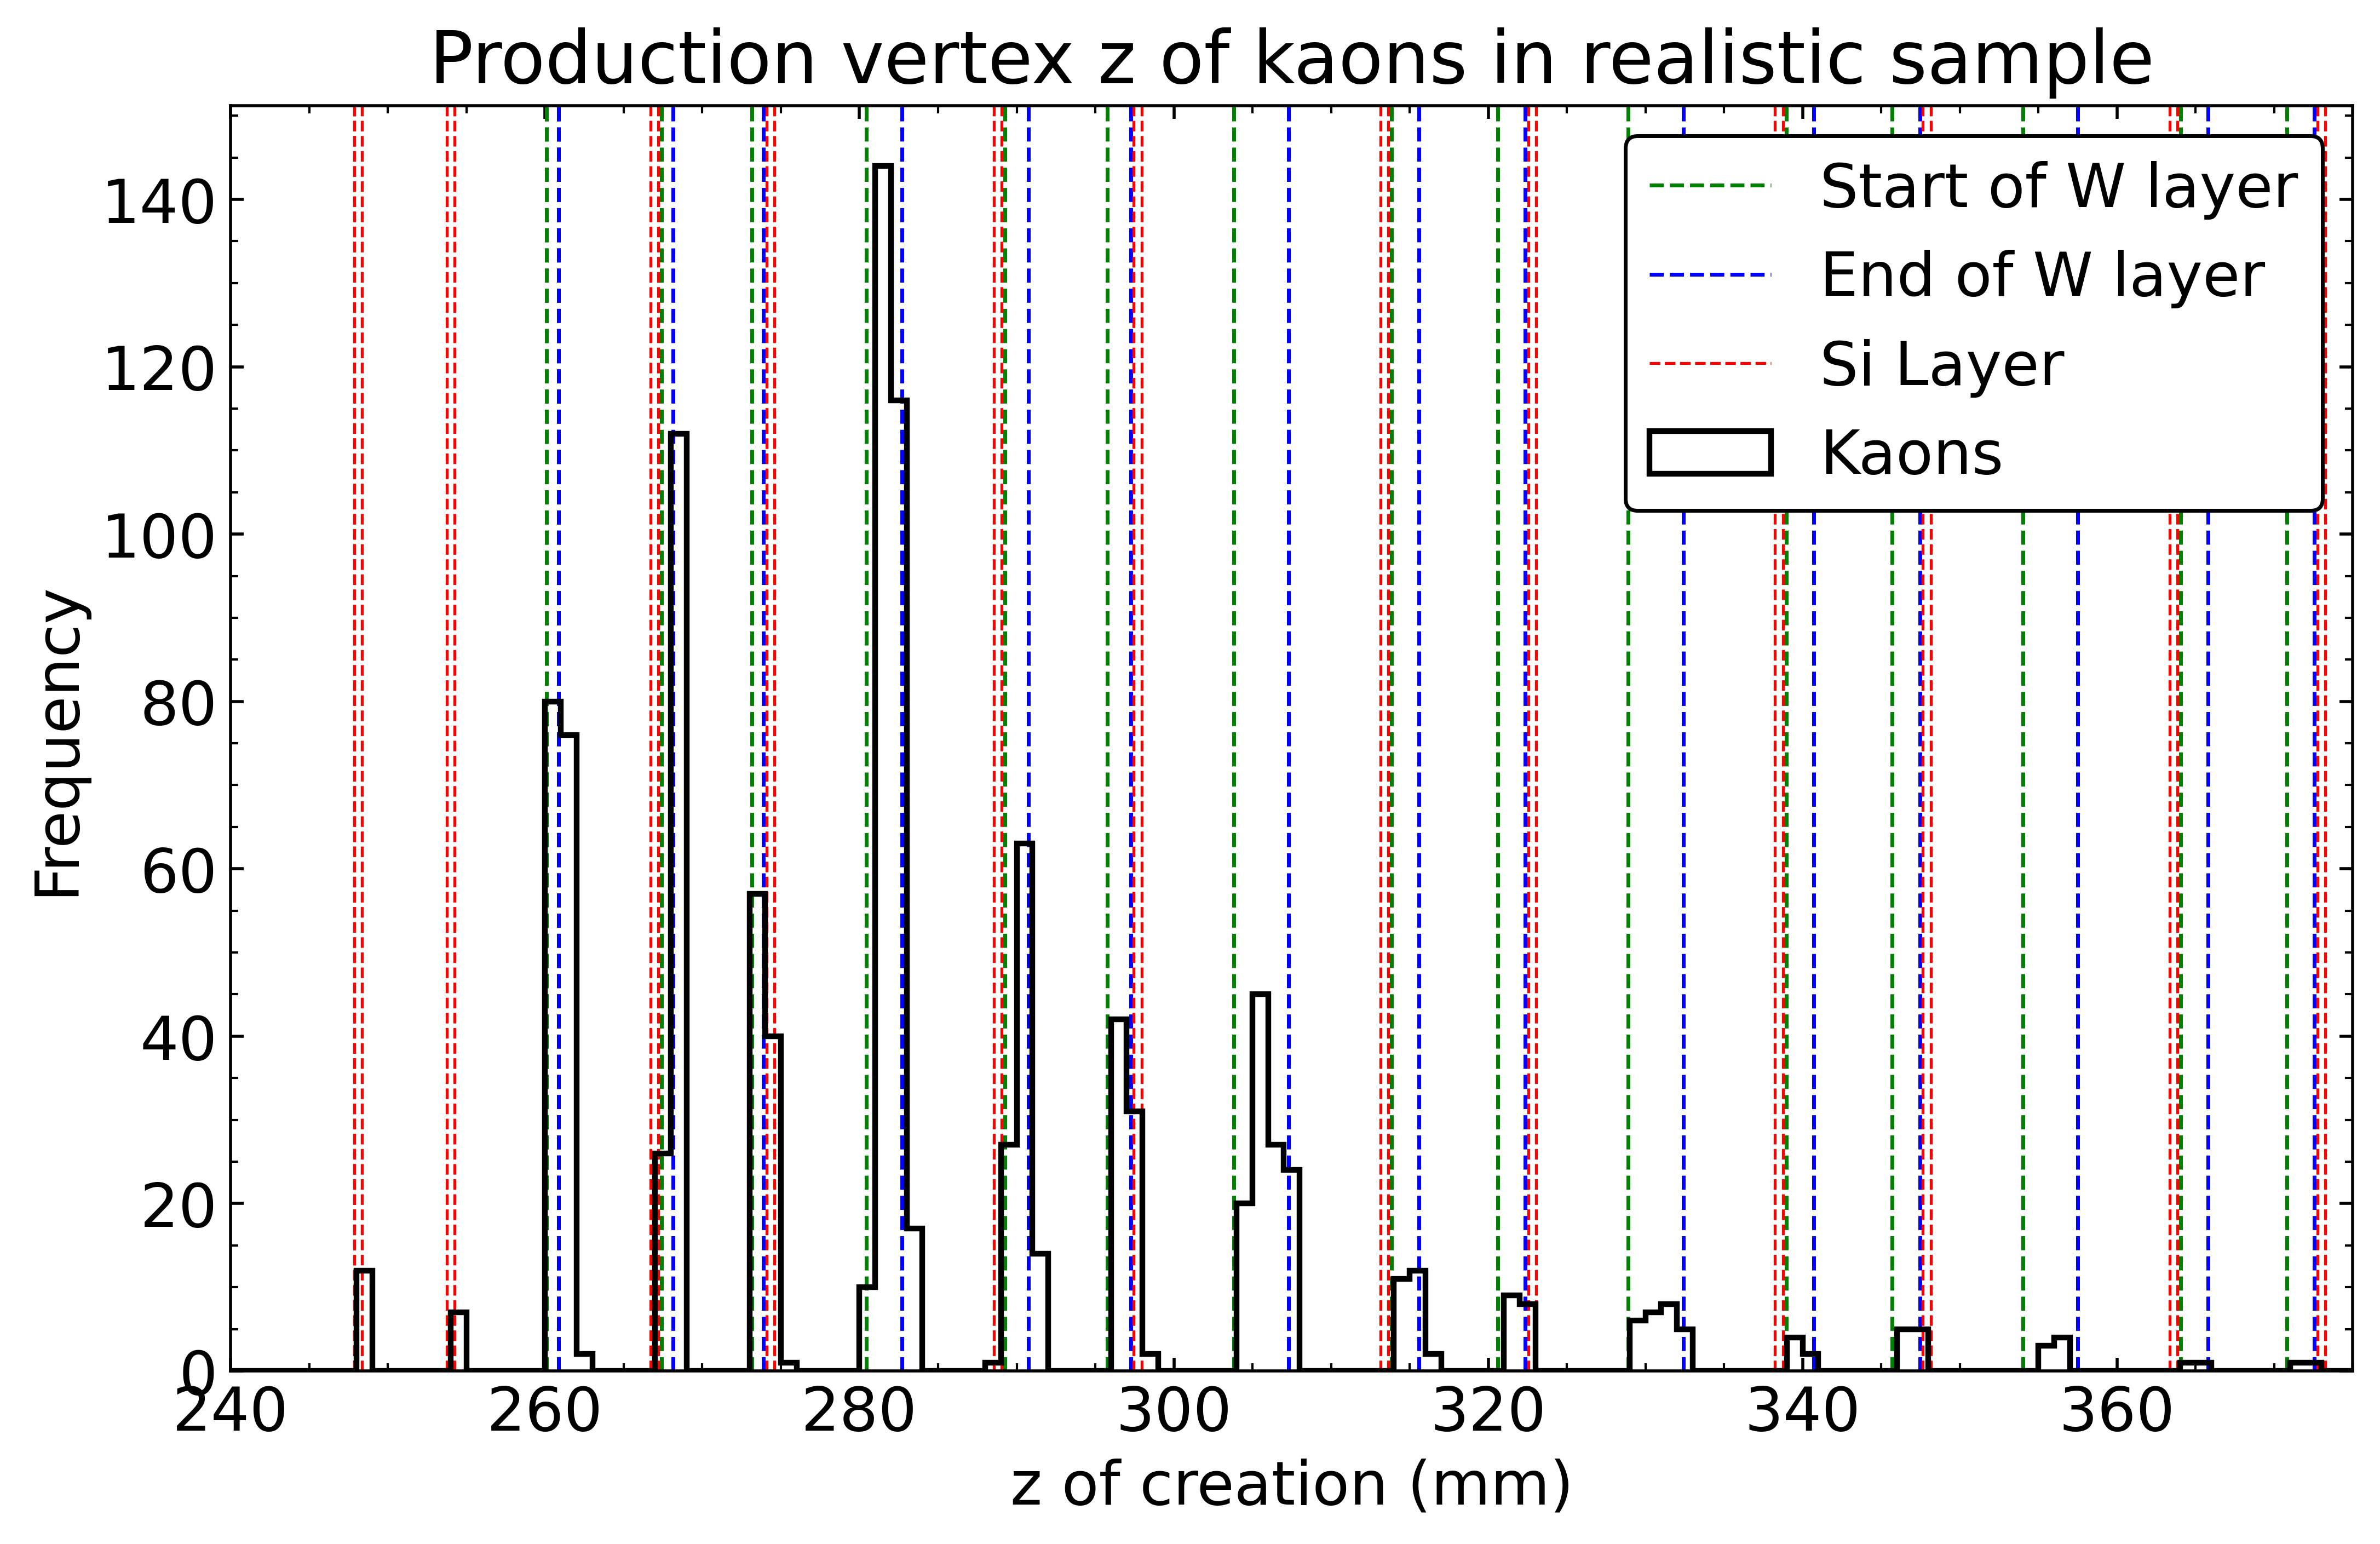

In [28]:

plt.figure(figsize=(10,6),dpi=500)
plt.axvline(start[0],linestyle='dashed',linewidth='1',color='green',label="Start of W layer")
plt.axvline(end[0],linestyle='dashed',linewidth='1',color='blue',label="End of W layer")
plt.axvline(sistart[0],linestyle='dashed',linewidth='0.75',color='red',label="Si Layer")
for i in range(len(start)):
    plt.axvline(end[i],linestyle='dashed',linewidth='1',color='blue')
    plt.axvline(start[i],linestyle='dashed',linewidth='1',color='green')
for i in range(len(sistart)):
    plt.axvline(sistart[i],linestyle='dashed',linewidth='0.75',color='red')
    plt.axvline(siend[i],linestyle='dashed',linewidth='0.75',color='red')
plt.hist(z,bins = np.arange(230,400,1),histtype='step',linewidth=1.5,color='black',label="Kaons")
#plt.hist(n_z,bins = np.arange(230,400,1),histtype='step',linewidth=1.5,color='purple',label="Kaons passing MIP")
#plt.yscale('log')
plt.xlabel("z of creation (mm)")
plt.ylabel("Frequency")
plt.title("Production vertex z of kaons in realistic sample")
plt.xlim(240,375)
plt.legend(facecolor='white',framealpha=1,edgecolor='black',loc='upper right')

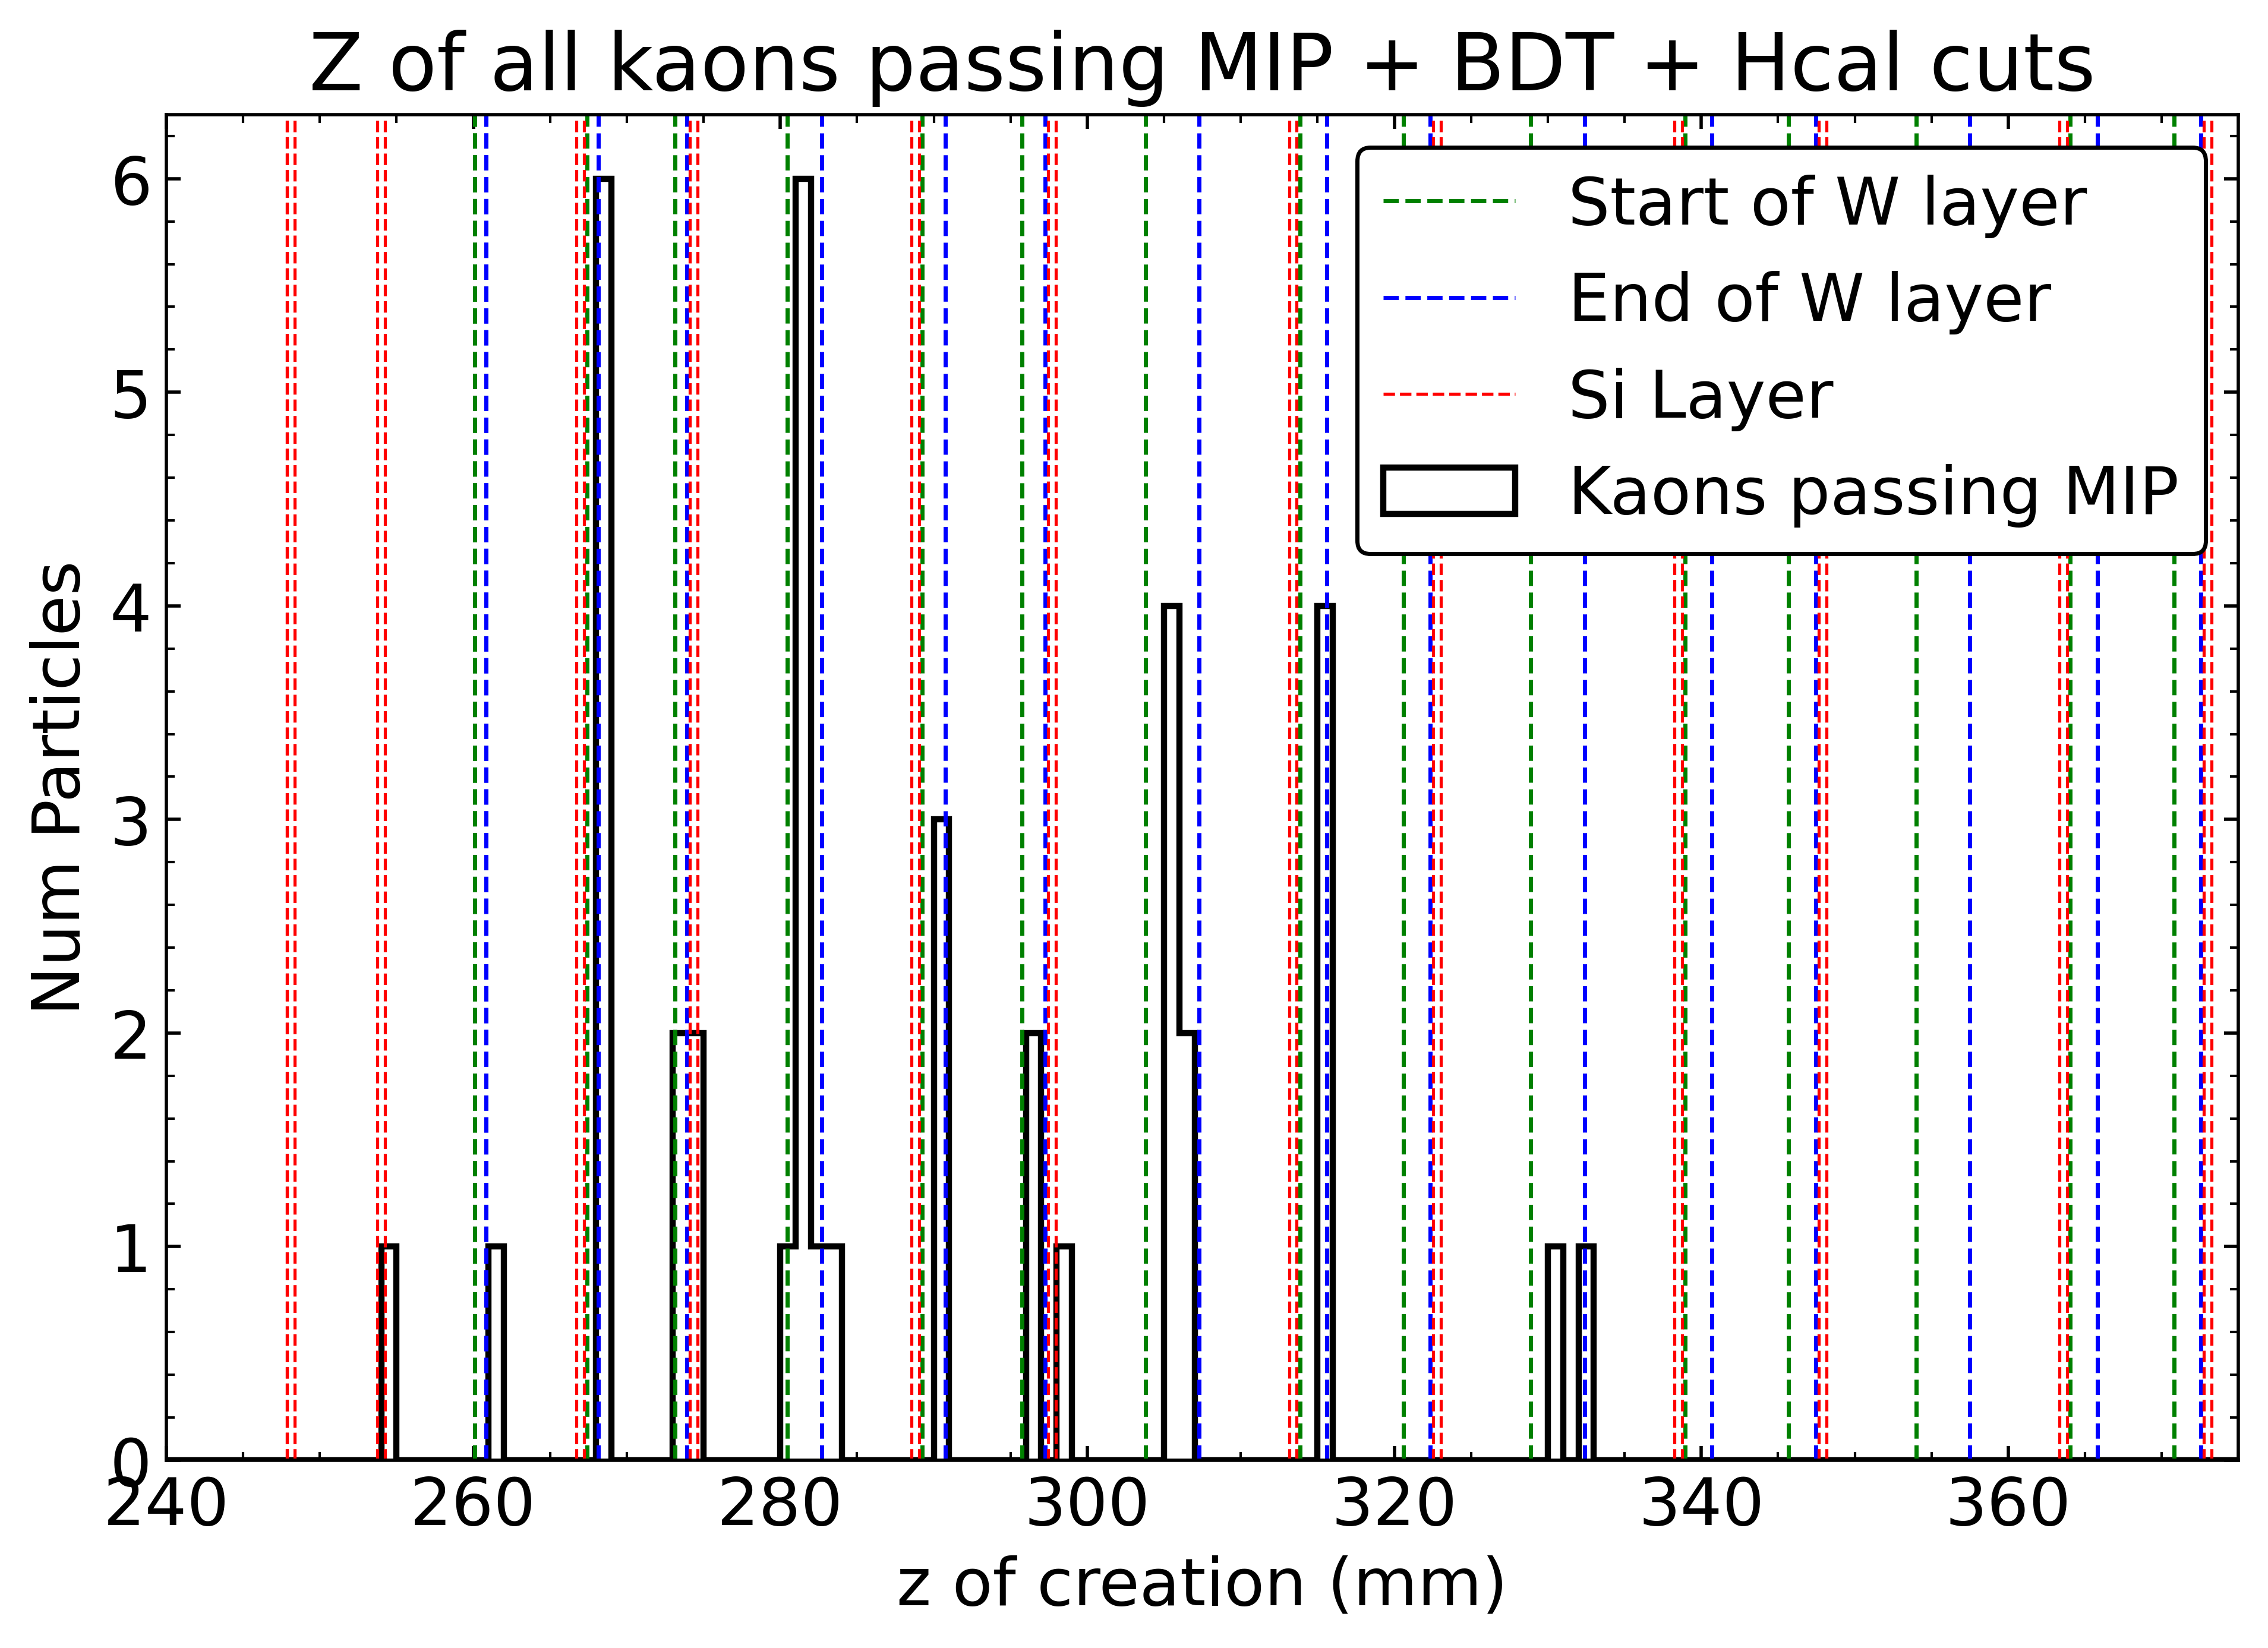

In [115]:
plt.figure(figsize=(9,6),dpi=500)
plt.axvline(start[0],linestyle='dashed',linewidth='1',color='green',label="Start of W layer")
plt.axvline(end[0],linestyle='dashed',linewidth='1',color='blue',label="End of W layer")
plt.axvline(sistart[0],linestyle='dashed',linewidth='0.75',color='red',label="Si Layer")
for i in range(len(start)):
    plt.axvline(end[i],linestyle='dashed',linewidth='1',color='blue')
    plt.axvline(start[i],linestyle='dashed',linewidth='1',color='green')
for i in range(len(sistart)):
    plt.axvline(sistart[i],linestyle='dashed',linewidth='0.75',color='red')
    plt.axvline(siend[i],linestyle='dashed',linewidth='0.75',color='red')
#plt.hist(z,bins = np.arange(230,400,1),histtype='step',linewidth=1.5,color='black',label="All kaons")
plt.hist(n_z,bins = np.arange(230,400,1),histtype='step',linewidth=1.5,color='black',label="Kaons passing MIP")
#plt.yscale('log')
plt.xlabel("z of creation (mm)")
plt.ylabel("Num Particles")
plt.title("Z of all kaons passing MIP + BDT + Hcal cuts")
plt.xlim(240,375)
plt.legend(facecolor='white',framealpha=1,edgecolor='black',loc='upper right')

In [5]:
def findclosestlayer(z):
    diff = []
    for i in range(len(start)):
        if start[i] < z:
            diff.append(z-start[i])
    closestlayerz = np.amin(diff)
    index = len(diff) - 1
    return (closestlayerz, index)

def findclosestsilayer(z):
    diff = []
    for i in range(len(sistart)):
        if sistart[i] < z:
            diff.append(z-sistart[i])
    closestlayerz = np.amin(diff)
    index = len(diff) - 1
    return (closestlayerz, index)

def isinabsorber(z):
    layerz, index = findclosestlayer(z)
    if (z > start[index]) and (z < end[index]):
        return True
    else:
        return False

def isinsi(z):
    silayerz, siindex = findclosestsilayer(z)
    if (z > sistart[siindex]) and (z < siend[siindex]):
        return True
    else:
        return False

    
numinabs = 0
numinsi = 0
numout = 0
zdiff = []
ind_ofabs= []
ind_ofsi = []
dzoflayer = []
for i in range(len(z)):
    if z[i] > start[0]:
        if isinabsorber(z[i]):
            numinabs += 1
            thisdiff, thisind = findclosestlayer(z[i])
            zdiff.append(thisdiff)
            ind_ofabs.append(i)
            thisdz = layer_thickness[thisind]
            dzoflayer.append(thisdz)

        if z[i] > sistart[0]:
            if isinsi(z[i]):
                numinsi += 1
                ind_ofsi.append(i)
    
numout = len(z) - numinabs - numinsi
        
print(numinabs, numinsi, numout)
print(numinabs/len(z))
print(numinsi/len(z))
print(numout/len(z))

678 45 369
0.6208791208791209
0.04120879120879121
0.33791208791208793


In [8]:
n_data = np.genfromtxt('/Users/chris/Desktop/ldmx/ldmx_files/kinematics_35events.txt',delimiter=',')
n_ids  = n_data[:,0]
n_E    = n_data[:,1]
n_pz   = n_data[:,2]
n_py   = n_data[:,3]
n_px   = n_data[:,4]
n_z    = n_data[:,5]
n_y    = n_data[:,6]
n_x    = n_data[:,7]

kmass = 493.7
n_KE = n_E - kmass

n_r = np.sqrt(n_px**2 + n_py**2)
n_tan_theta = n_r/np.abs(n_pz)
n_theta = np.arctan(n_tan_theta) * 180/np.pi



In [9]:
n_numinabs = 0
n_numinsi = 0
n_numout = 0
n_zdiff = []
n_dzoflayer  = []
for i in range(len(n_z)):
    if n_z[i] > start[0]:
        if isinabsorber(n_z[i]):
            n_numinabs += 1
            n_zdiff.append(findclosestlayer(n_z[i])[0])
            n_thisdz = layer_thickness[findclosestlayer(n_z[i])[1]]
            n_dzoflayer.append(n_thisdz)
        if n_z[i] > sistart[0]:
            if isinsi(n_z[i]) :
                n_numinsi += 1
                
n_numout = len(n_z) - n_numinabs - n_numinsi
        
print(n_numinabs, n_numinsi, n_numout)
print(n_numinabs/len(n_z))
print(n_numinsi/len(n_z))
print(n_numout/len(n_z))

26 2 11
0.6666666666666666
0.05128205128205128
0.28205128205128205


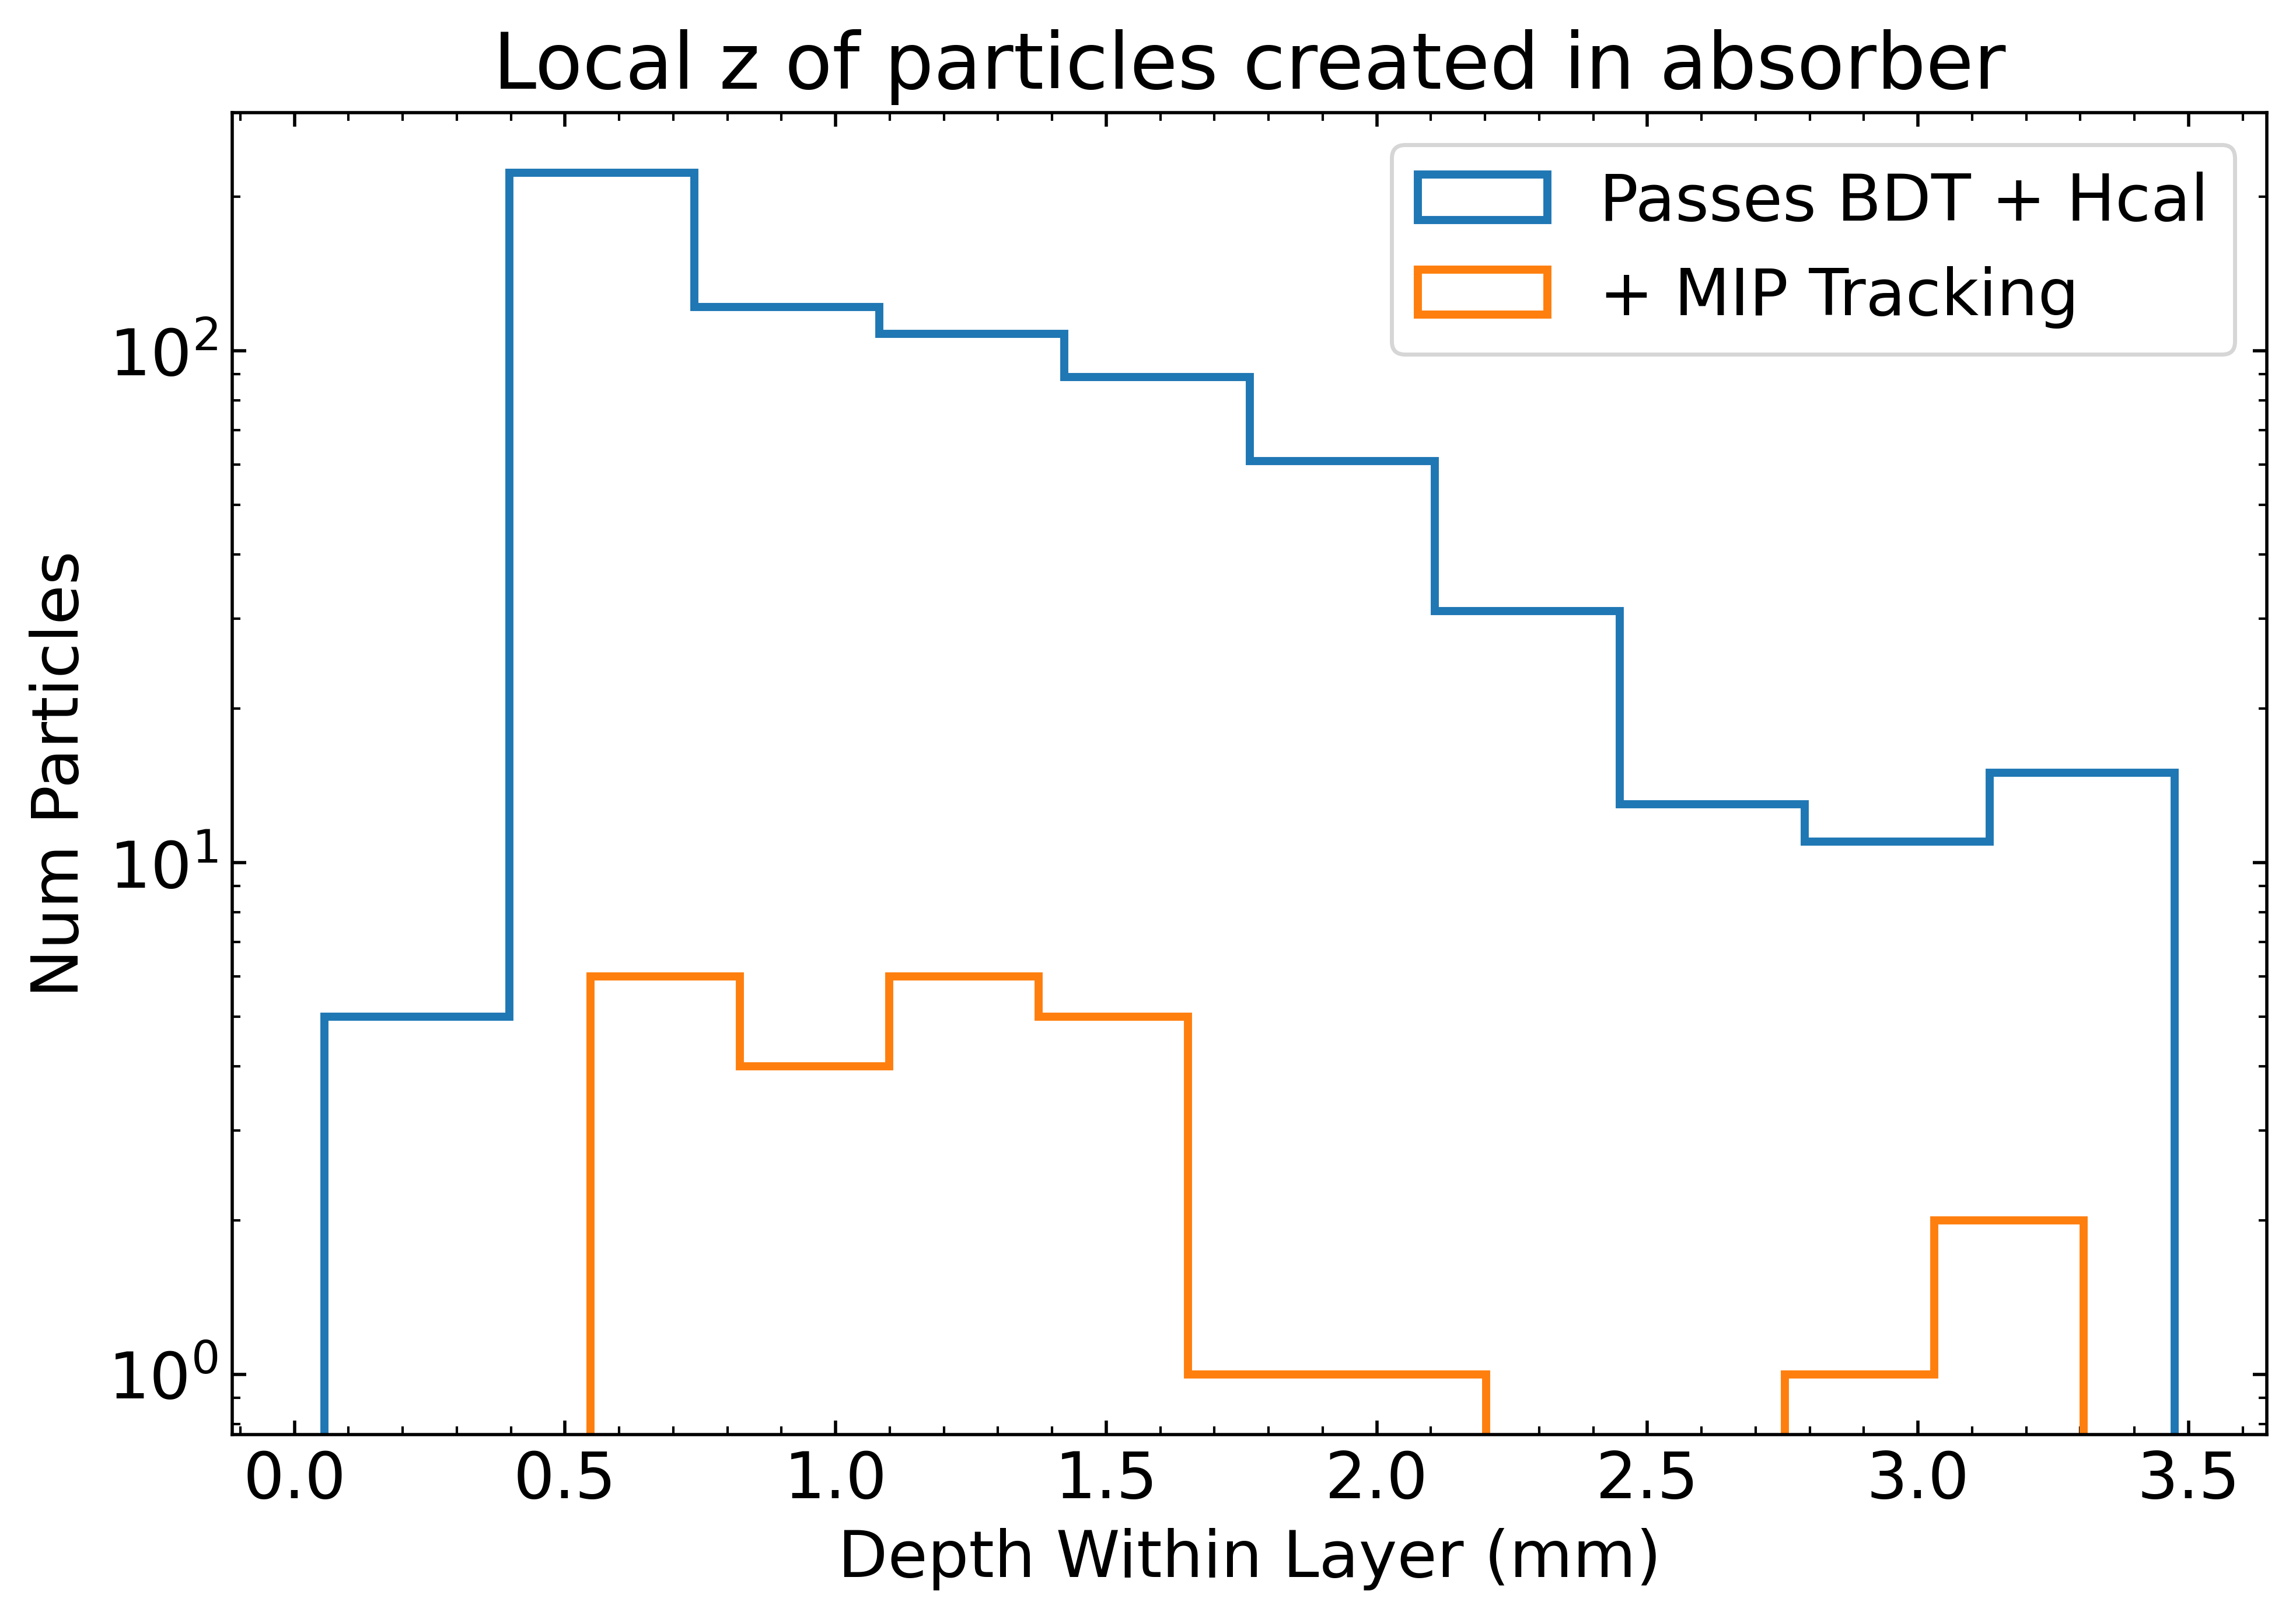

In [93]:
plt.figure(figsize=(9,6),dpi=500)
plt.hist(zdiff,label="Passes BDT + Hcal",histtype='step',linewidth=2)
plt.hist(n_zdiff,label="+ MIP Tracking",histtype='step',linewidth=2)
plt.yscale('log')
plt.xlabel("Depth Within Layer (mm)")
plt.ylabel("Num Particles")
plt.title("Local z of particles created in absorber")
plt.legend()

678 678


(0.0, 11.0)

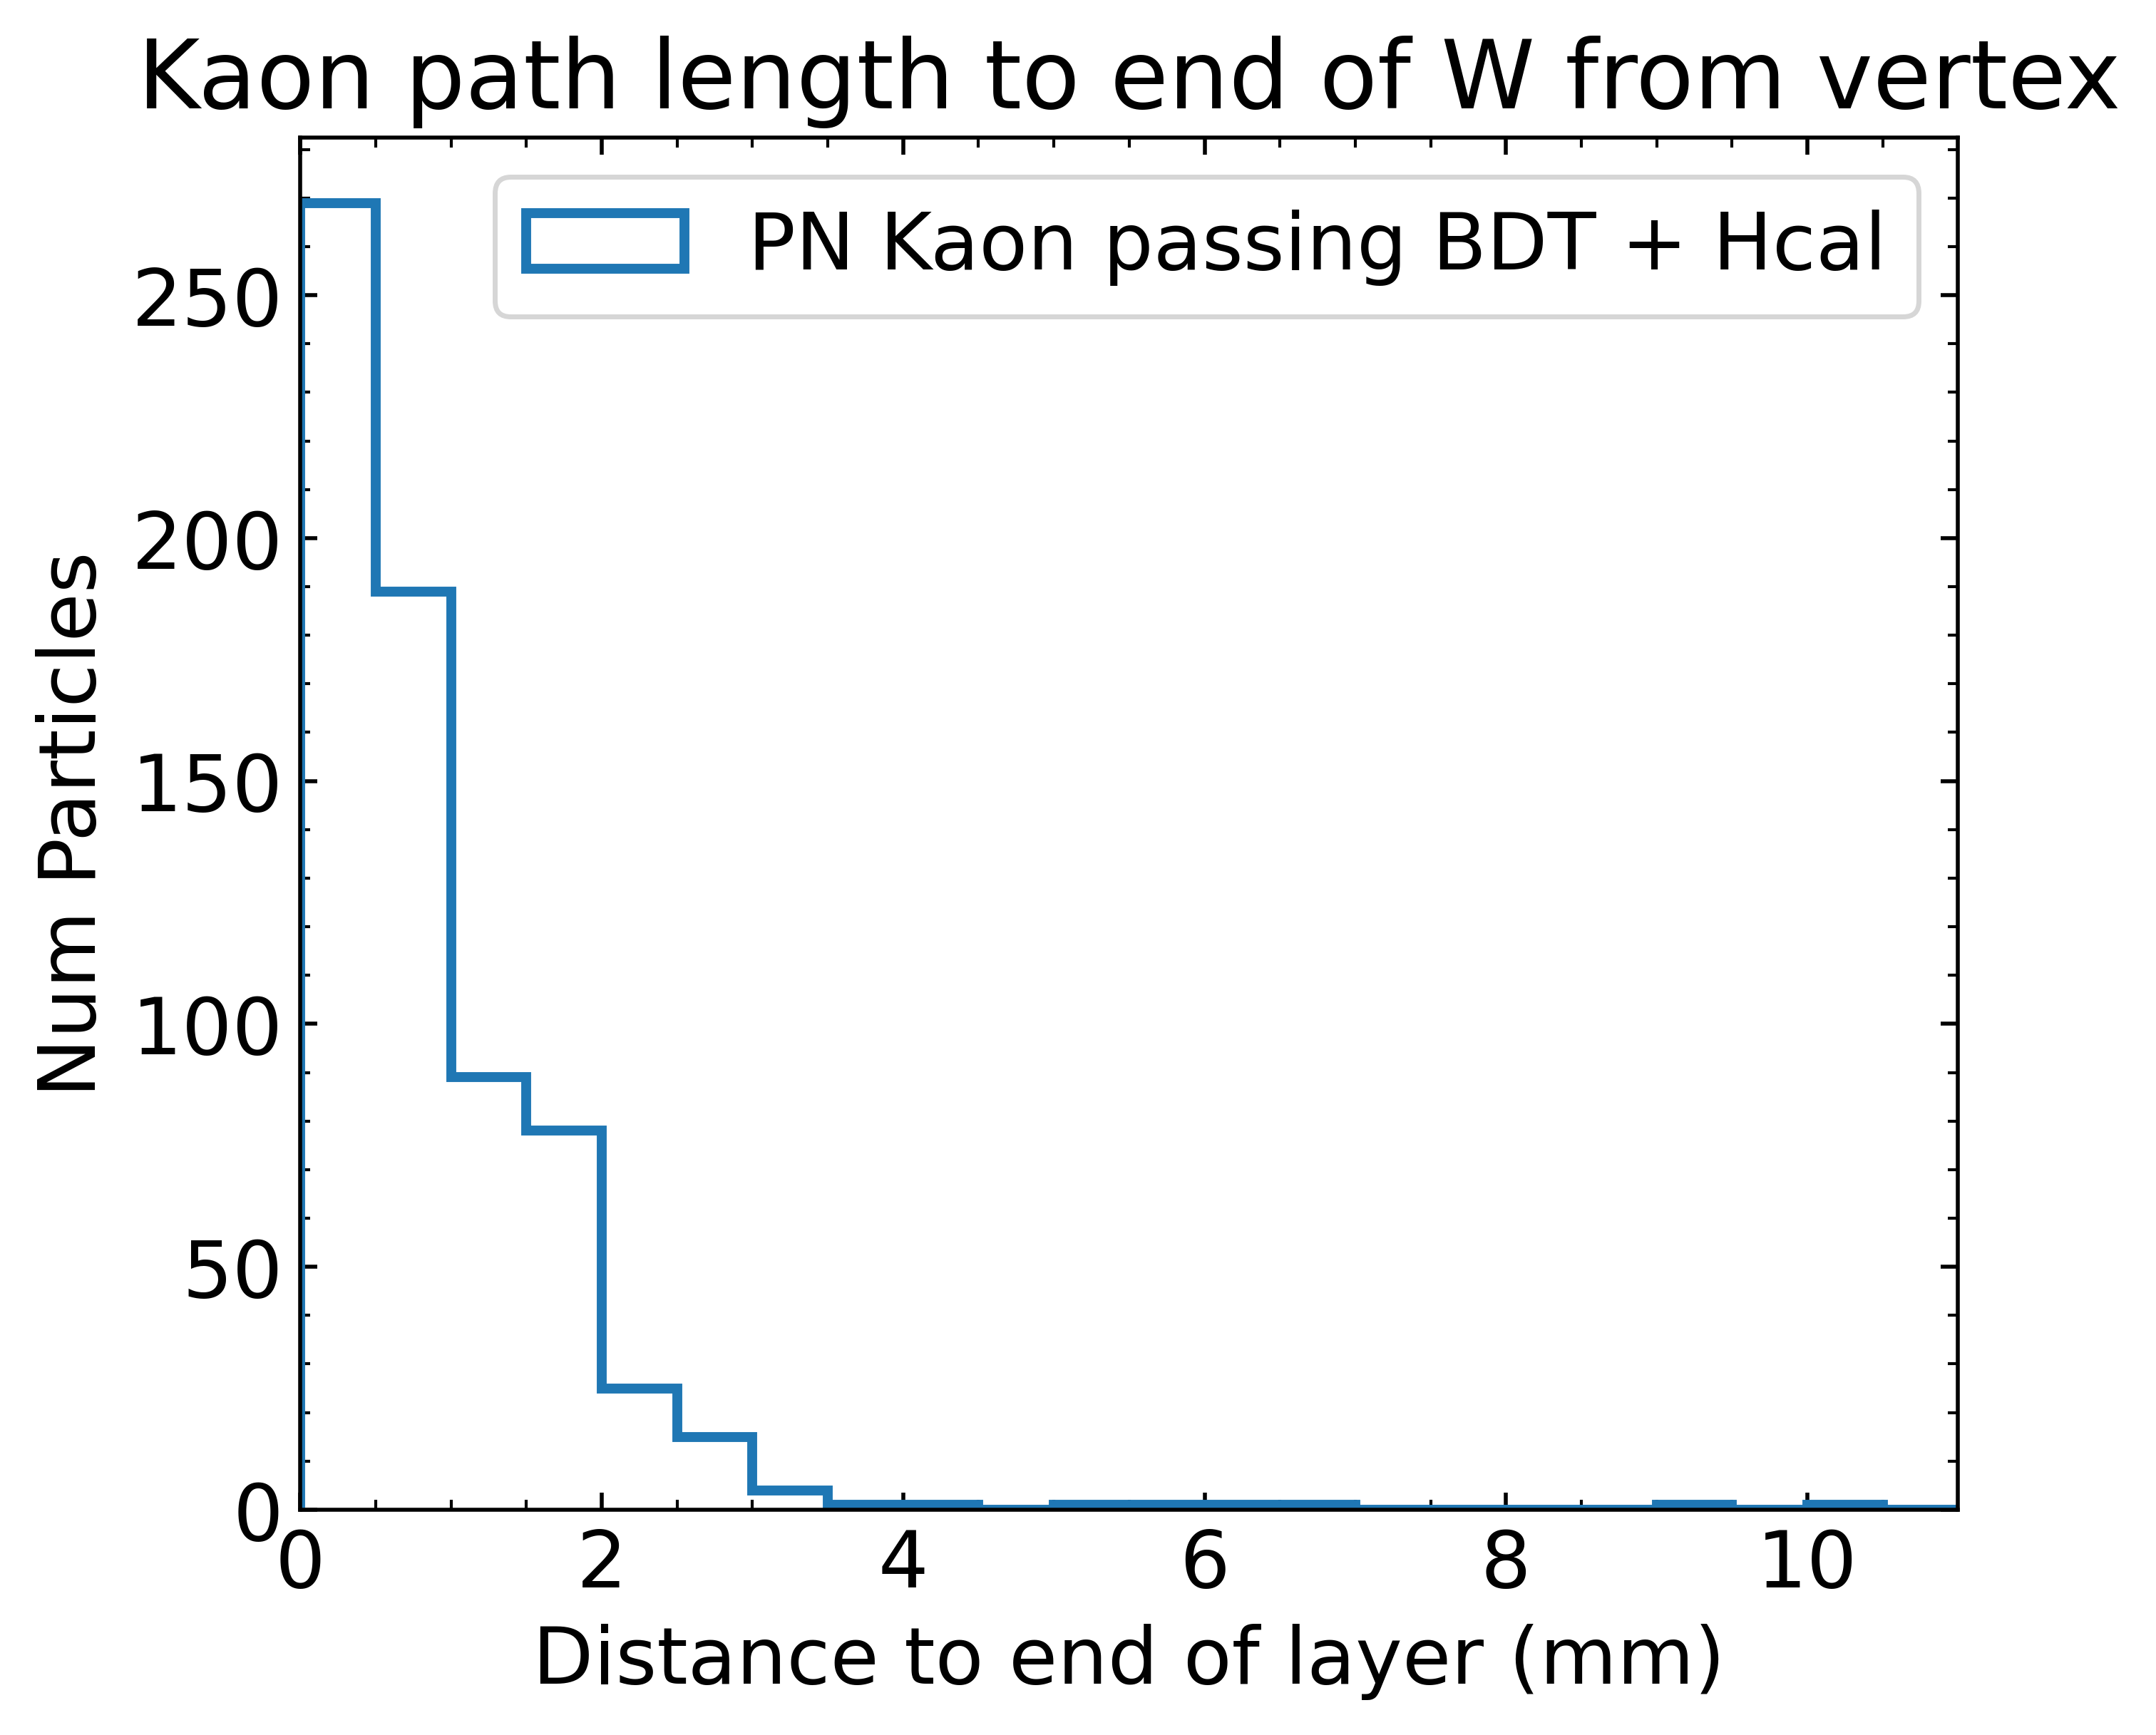

In [22]:
# find distance it has to travel in the layer before escaping in just z dir
plt.figure(figsize=(6,5),dpi=500)

# full sample
distancetoend = np.zeros(len(zdiff))
rdist = np.zeros(len(zdiff))

for i in range(len(distancetoend)):
    if pz[i] > 0:
        distancetoend[i] = dzoflayer[i] - zdiff[i]        
    else:
        distancetoend[i] = zdiff[i]
    rdist[i] = distancetoend[i] / np.cos(np.radians(theta[i]))

# 39 events
n_distancetoend = np.zeros(len(n_zdiff))
n_rdist = np.zeros(len(n_zdiff))

for i in range(len(n_distancetoend)):
    if n_pz[i] > 0:
        n_distancetoend[i] = n_dzoflayer[i] - n_zdiff[i]
    else:
        n_distancetoend[i] = n_zdiff[i] 
    n_rdist[i] = n_distancetoend[i] / np.cos(np.radians(n_theta[i]))

bins = np.arange(0,15,0.5)
#plt.hist(distancetoend,bins=bins,label="Passes BDT + Hcal",histtype='step',linewidth=2)
#plt.hist(n_distancetoend,bins=bins,label="+ MIP Tracking",histtype='step',linewidth=2)

plt.hist(rdist,bins=bins,label="PN Kaon passing BDT + Hcal",histtype='step',linewidth=2)
#plt.hist(n_rdist,bins=bins,label="+ MIP Tracking",histtype='step',linewidth=2)

print(len(distancetoend), len(rdist))
#plt.yscale('log')
plt.xlabel("Distance to end of layer (mm)")
plt.ylabel("Num Particles")
plt.title("Kaon path length to end of W from vertex")
plt.legend()
plt.xlim(0,11)

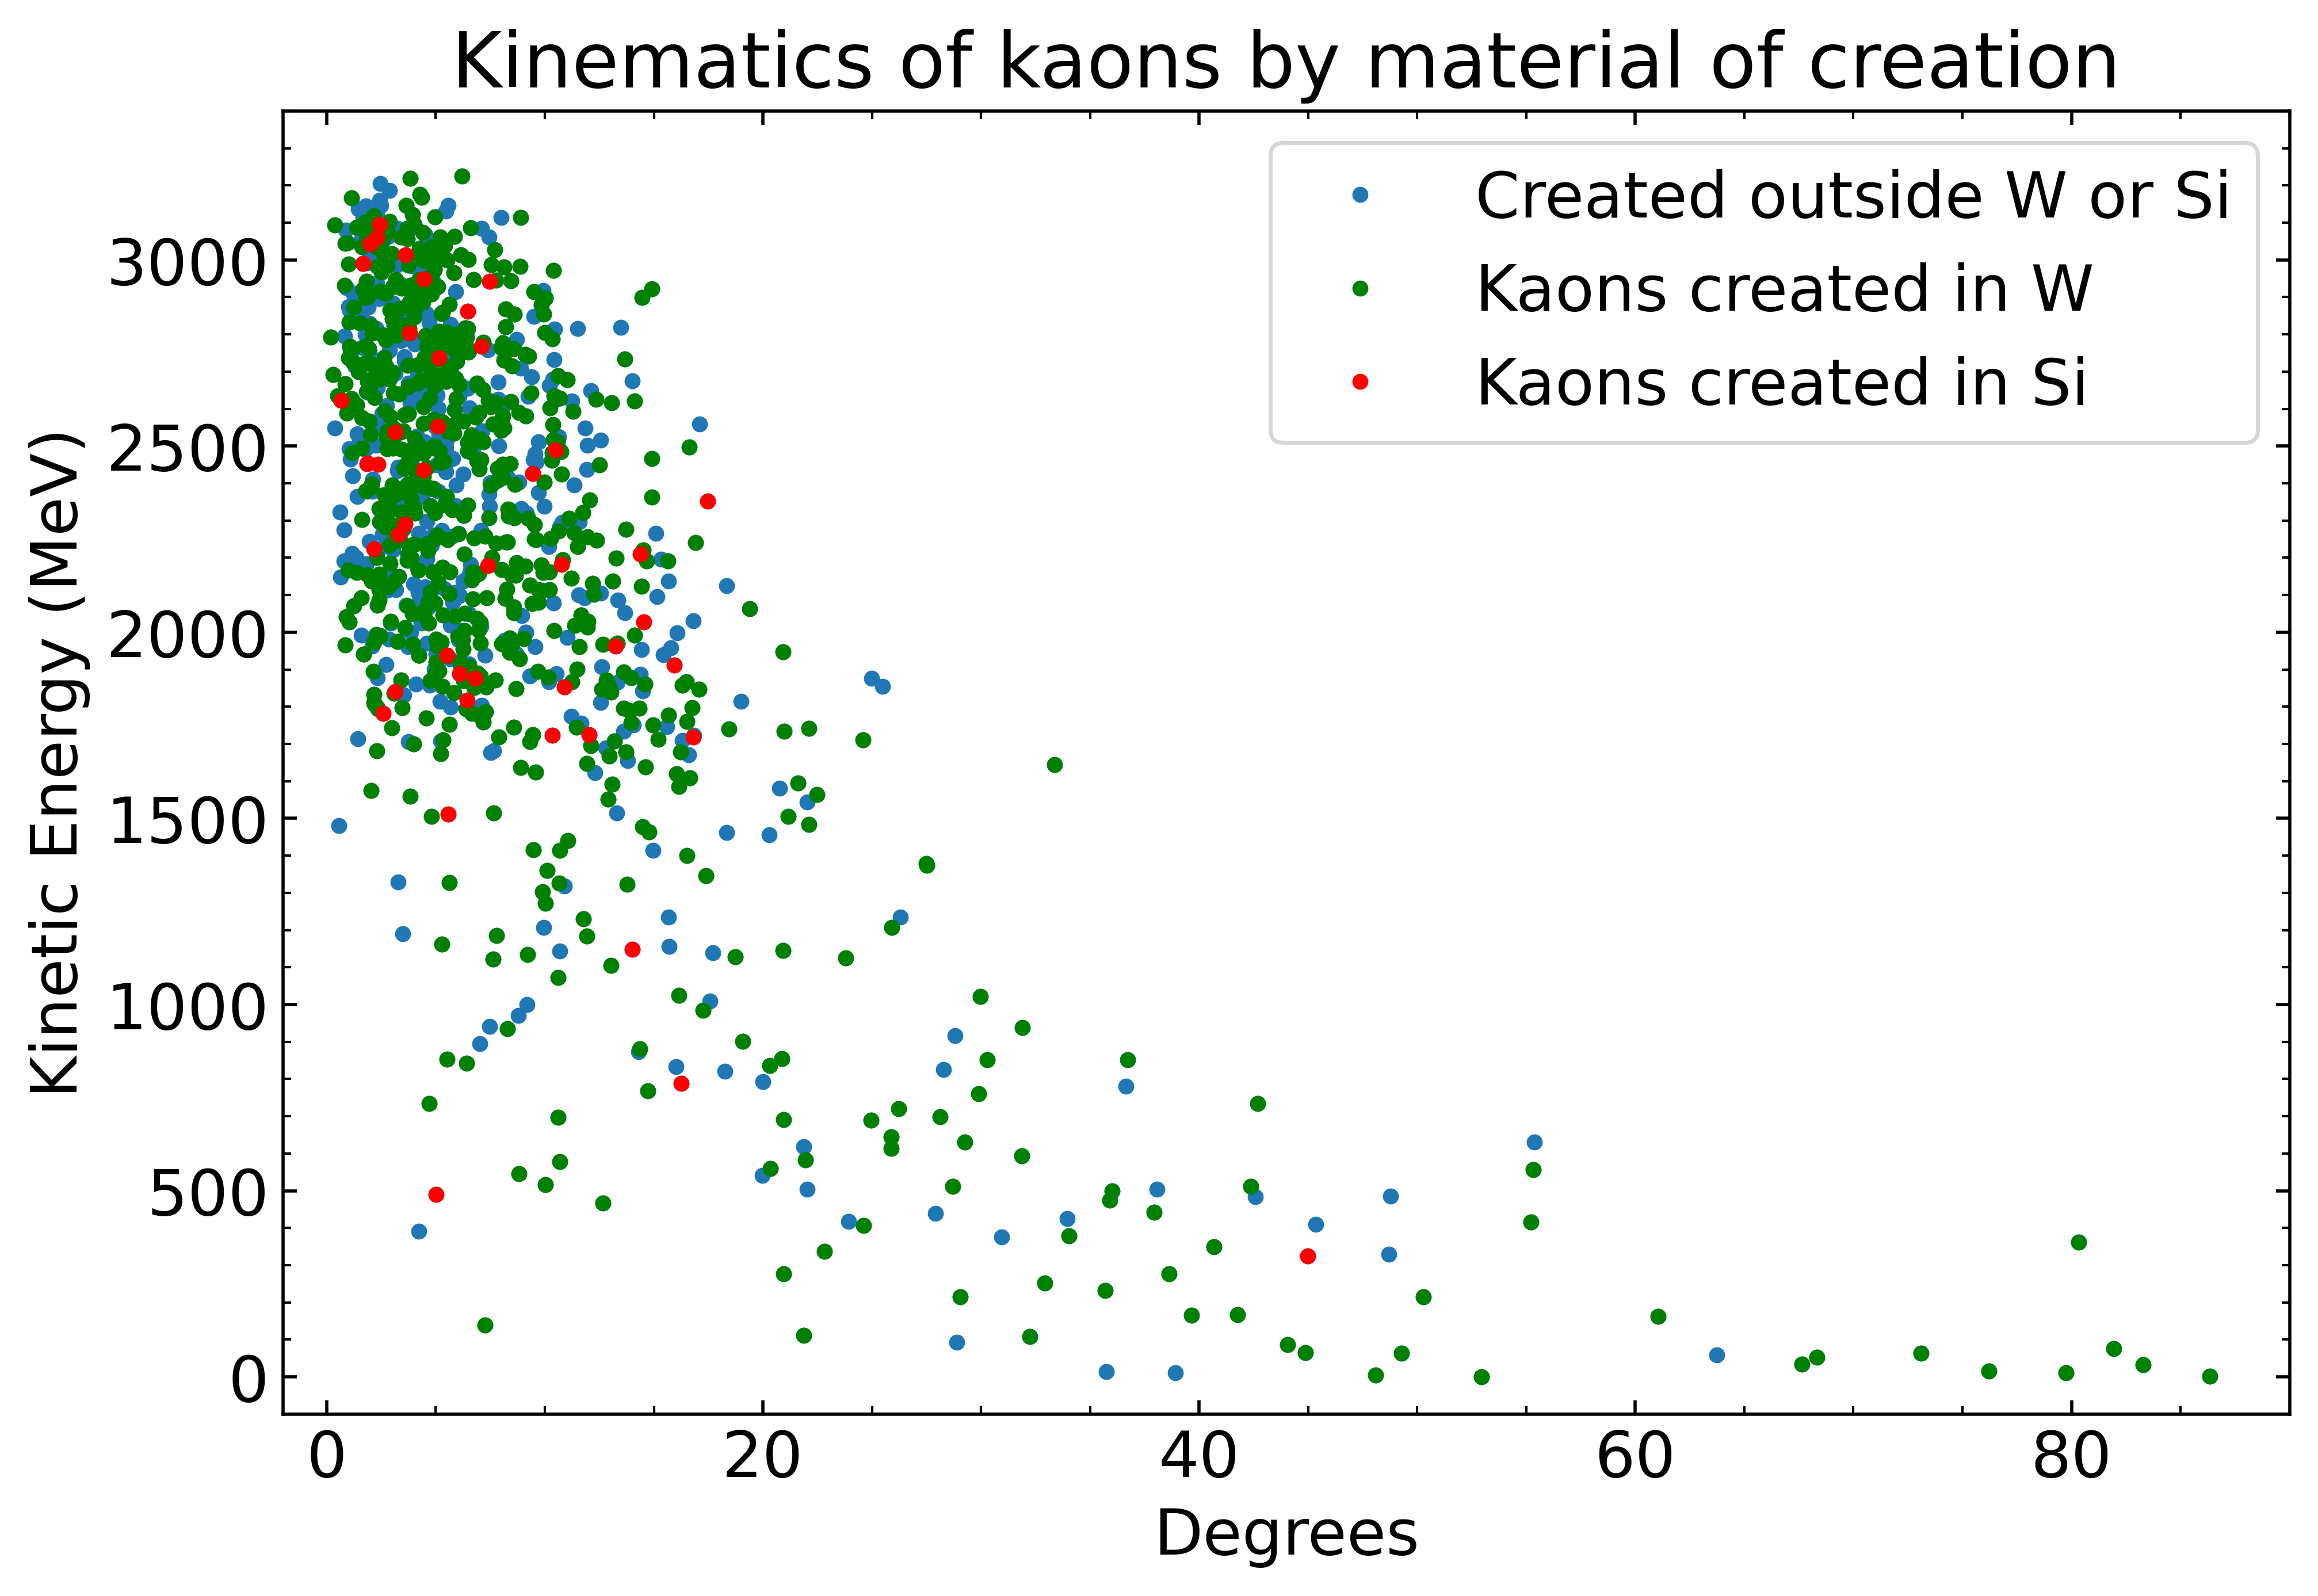

In [183]:
# Scatter plot comparing angle and energy
plt.figure(figsize=(9,6),dpi=500)

plt.plot(theta,KE,'.',label='Created outside W or Si',color="C0")
#plt.plot(n_theta,n_KE,'.',color='red',label='+ MIP Cuts')
plt.xlabel("Degrees")
plt.ylabel("Kinetic Energy (MeV)")
plt.title("Kinematics of kaons by material of creation")
plt.plot(theta[ind_ofabs[0]],KE[ind_ofabs[0]],color='green',linewidth=4)
plt.ylim(-100,3400)
plt.xlim(-2,90)

inw_theta = []
inw_ke = []

insi_theta = []
insi_ke = []

out_theta = []
out_ke = []



plt.plot(theta[ind_ofabs[0]],KE[ind_ofabs[0]],'.', color='green',label="Kaons created in W")
for i in range(len(ind_ofabs)):
    plt.plot(theta[ind_ofabs[i]],KE[ind_ofabs[i]],'.', color='green')
    inw_theta.append(theta[ind_ofabs[i]])
    inw_ke.append(KE[ind_ofabs[i]])
    
plt.plot(theta[ind_ofsi[0]],KE[ind_ofsi[0]],'.', color='red',label="Kaons created in Si")
for i in range(len(ind_ofsi)):
    plt.plot(theta[ind_ofsi[i]],KE[ind_ofsi[i]],'.', color='red')
    insi_theta.append(theta[ind_ofsi[i]])
    insi_ke.append(KE[ind_ofsi[i]])

    
# plot fit
#plt.plot(xvals,yvals,label=r"Fit From Gun: Events Producing $\geq$3 Hits",linestyle='--',linewidth='2',color='red')
plt.legend()

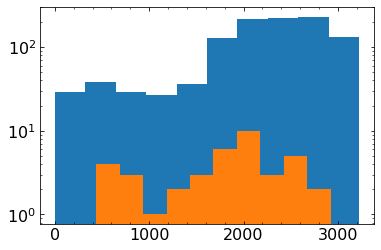

In [174]:
plt.hist(KE)
plt.hist(n_KE)
plt.yscale('log')

In [185]:
# for the plot showing diff b/w 39 events and total on same scatter
print(np.average(KE),np.std(KE))
print(np.average(n_KE),np.std(n_KE))

print(np.average(theta),np.std(theta))
print(np.average(n_theta),np.std(n_theta))


# for the by material of creation plot
print(np.average(inw_ke),np.std(inw_ke))
print(np.average(insi_ke),np.std(insi_ke))

print(np.average(inw_theta),np.std(inw_theta))
print(np.average(insi_theta),np.std(insi_theta))




2186.81880249918 705.5760471255832
1783.1635995441686 655.7479053622571
9.146866017537349 10.641691644312077
14.686804566376185 9.54008094885632
2159.896104853206 731.5565435625808
2193.6625688059357 642.9128198850337
9.713326577243587 11.732699396143374
7.890119187220923 7.338152882953945


In [177]:
help(np.std)

Help on function std in module numpy:

std(a, axis=None, dtype=None, out=None, ddof=0, keepdims=<no value>, *, where=<no value>)
    Compute the standard deviation along the specified axis.
    
    Returns the standard deviation, a measure of the spread of a distribution,
    of the array elements. The standard deviation is computed for the
    flattened array by default, otherwise over the specified axis.
    
    Parameters
    ----------
    a : array_like
        Calculate the standard deviation of these values.
    axis : None or int or tuple of ints, optional
        Axis or axes along which the standard deviation is computed. The
        default is to compute the standard deviation of the flattened array.
    
        .. versionadded:: 1.7.0
    
        If this is a tuple of ints, a standard deviation is performed over
        multiple axes, instead of a single axis or all the axes as before.
    dtype : dtype, optional
        Type to use in computing the standard deviation. 

In [188]:
data_endpts_all = np.genfromtxt('/Users/chris/Desktop/ldmx/ldmx_files/simparticleinfo_endpts.txt',delimiter=',')
endz  = data_endpts_all[:,0]
endy  = data_endpts_all[:,1]
endx  = data_endpts_all[:,2]

data_endpts_n = np.genfromtxt('/Users/chris/Desktop/ldmx/ldmx_files/endpts_35events.txt',delimiter=',')
n_endz  = data_endpts_n[:,0]
n_endy  = data_endpts_n[:,1]
n_endx  = data_endpts_n[:,2]

rtot = np.sqrt((z-endz)**2 + (y-endy)**2 + (x-endx)**2)
n_rtot = np.sqrt((n_z-n_endz)**2 + (n_y-n_endy)**2 + (n_x-n_endx)**2)

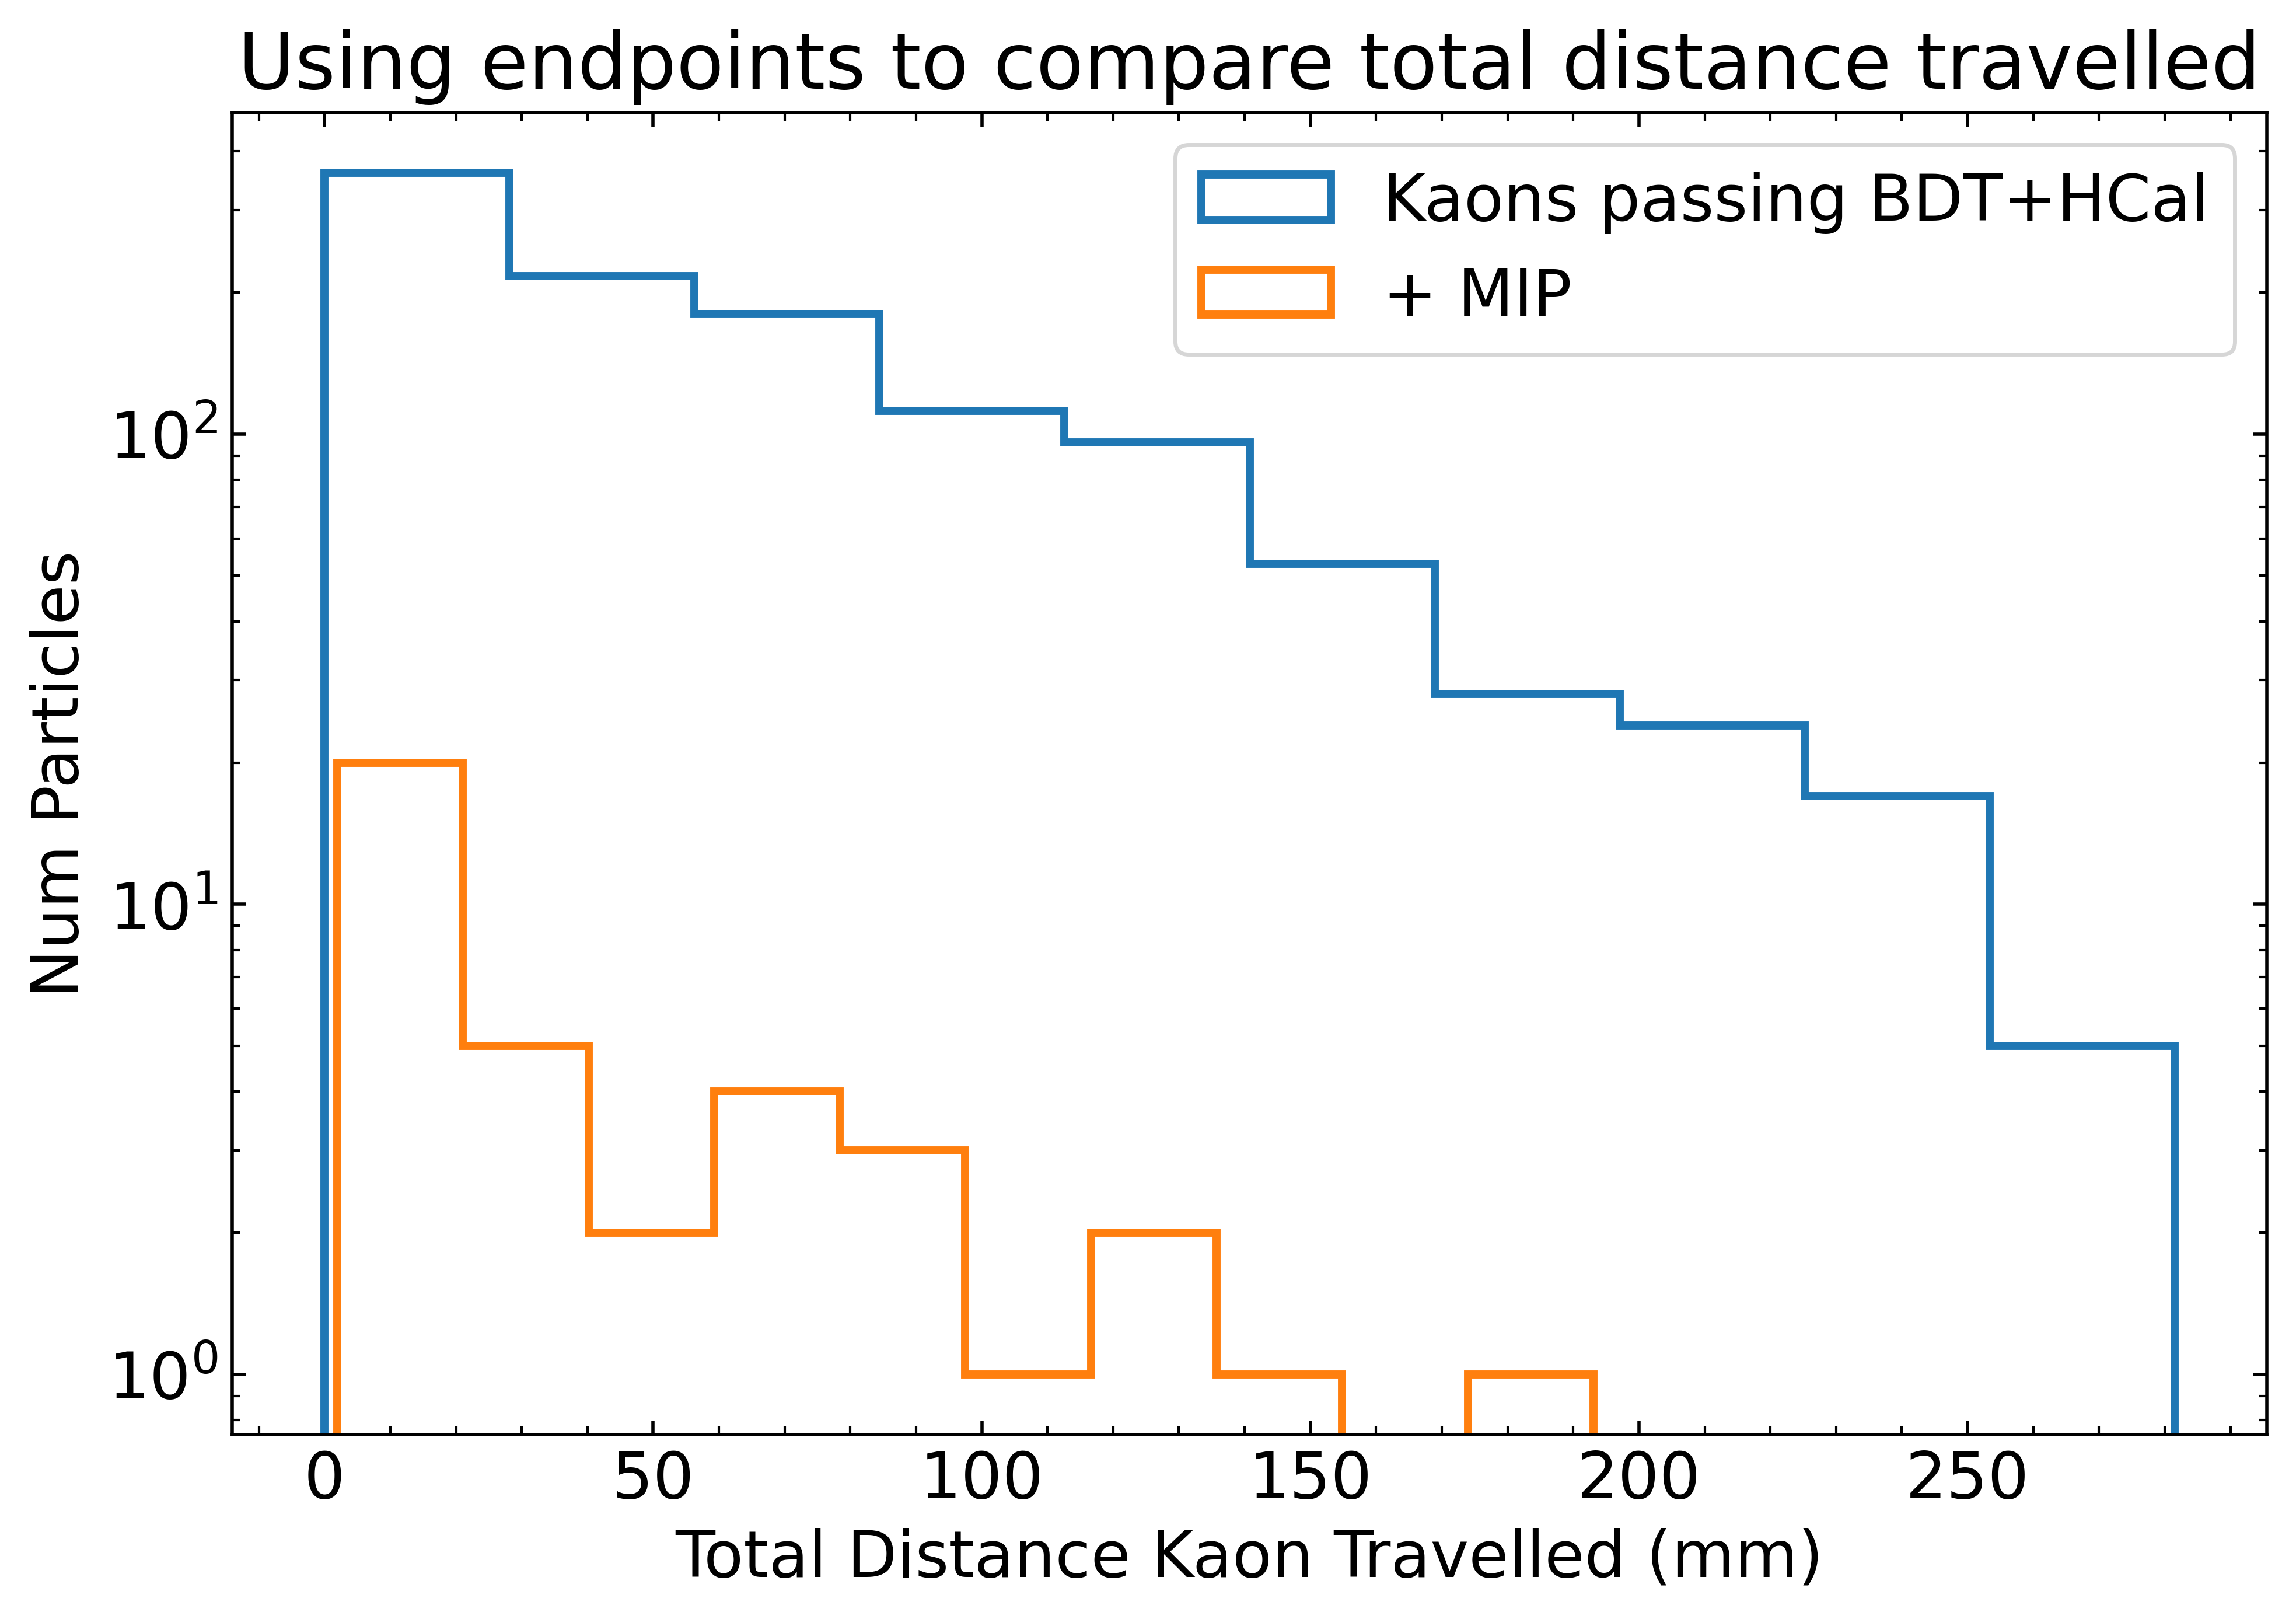

In [193]:
plt.figure(figsize=(9,6),dpi=500)

plt.hist(rtot,histtype='step',label='Kaons passing BDT+HCal',linewidth=2)
plt.hist(n_rtot,histtype='step',label='+ MIP',linewidth=2)
plt.yscale('log')
plt.xlabel("Total Distance Kaon Travelled (mm)")
plt.ylabel("Num Particles")
plt.title("Using endpoints to compare total distance travelled")
plt.legend()

In [194]:
print(np.average(rtot),np.std(rtot))
print(np.average(n_rtot),np.std(n_rtot))

66.7863348708084 57.98042451550971
42.19757010982882 47.3041482769768


In [196]:
print(np.median(rdist),np.std(rdist))
print(np.median(n_rdist),np.std(n_rdist))

0.6987740381534857 1.0811441955585492
0.7260670949125143 0.6781790857201204


In [198]:
print(np.average(z),np.std(z))
print(np.average(n_z),np.std(n_z))

284.7057429410073 20.739812080502748
289.19532582532435 19.088852108665392
